In [5]:
import re

def process_line(stdout):
    energy = []
    sign = []
    time = []
    dimer = []
    weight_r = []

    for line in str(stdout).split("\\n"):

        pat = "Total Energy"
        if pat in line:
            line = line.replace(pat,"")
            line = line.replace(" ","")
            line = line.replace("=","")
            line = line.split("+-")
            energy = [float(line[0]), float(line[1])]


        pat = "average sign"
        if pat in line:
            line = line.replace(pat,"")
            line = line.replace(" ","")
            line = line.replace("=","")
            line = line.split("+-")
            sign = [float(line[0]), float(line[1])]

        pat = "Elapsed time"
        if pat in line:
            line = line.replace(pat,"")
            line = line.replace(" ","")
            line = line.replace("=","")
            line = line.replace("sec","")
            time = [float(line)]
            
        pat = "dimer operator"
        if pat in line:
            line = line.replace(pat,"")
            line = line.replace(" ","")
            line = line.replace("=","")
            dimer = [float(line)]
            
        pat = "average weight rate"
        if pat in line:
            line = line.replace(pat,"")
            line = line.replace(" ","")
            line = line.replace("=","")
            line = line.split("+-")
            weight_r = [float(line[0]), float(line[1])]

            
    return energy, sign, dimer, time, weight_r

## calculate exact value

In [6]:
from header import *

In [7]:
import os
import numpy as np
os.chdir("../../Release")
# T =  np.logspace(-1, -0.3, num=10)

# original Majumdar-Ghosh model

## sampling energies for several temperature 

### L = 12

In [8]:
# L = np.arange(2, 15, 2)
T_list = []
sign_list = []


In [9]:
T_list = [np.logspace(0, -0.3, num=10)]*2 + [np.logspace(0, -0.5, num=10), np.logspace(0, -0.6, num=10)]

In [12]:
import subprocess
energy_array = []
time_array = []
sign_array = []
for t in T_list[0]:
    out = subprocess.Popen(["./test_/3site_construct", "-L1", "12", "-T", f"{t}", "-m", "majumdar_ghosh_1D_chain"], 
               stdout=subprocess.PIPE, 
               stderr=subprocess.STDOUT)
    stdout,stderr = out.communicate()

    energy, sign, dimer, time, _ = process_line(stdout)
    print(f"T = {t}",sign)
    energy_array.append(energy)
    sign_array.append(sign)
    time_array.append(time)
    
sign_list.append(np.array(sign_array))

T = 1.0 [0.34472, 0.000938706]
T = 0.9261187281287935 [0.271784, 0.000962359]
T = 0.8576958985908941 [0.19656, 0.000980492]
T = 0.7943282347242815 [0.143966, 0.000989583]
T = 0.7356422544596414 [0.095846, 0.000995397]
T = 0.6812920690579612 [0.058748, 0.000998273]
T = 0.6309573444801932 [0.03267, 0.000999467]
T = 0.5843414133735176 [0.01928, 0.000999815]
T = 0.5411695265464637 [0.010668, 0.000999944]
T = 0.5011872336272722 [0.002206, 0.000999998]


In [13]:
import subprocess
energy_array = []
time_array = []
sign_array = []
for t in T_list[1]:
    out = subprocess.Popen(["./test_/3site_construct", "-L1", "12", "-T", f"{t}", "-m", "majumdar_ghosh_optim8"], 
               stdout=subprocess.PIPE, 
               stderr=subprocess.STDOUT)
    stdout,stderr = out.communicate()

    energy, sign, dimer, time, _ = process_line(stdout)
    print(f"T = {t}",sign)
    energy_array.append(energy)
    sign_array.append(sign)
    time_array.append(time)
    
sign_list.append(np.array(sign_array))

T = 1.0 [0.362638, 0.000931931]
T = 0.9261187281287935 [0.28597, 0.000958239]
T = 0.8576958985908941 [0.214628, 0.000976696]
T = 0.7943282347242815 [0.160084, 0.000987104]
T = 0.7356422544596414 [0.108032, 0.000994148]
T = 0.6812920690579612 [0.065824, 0.000997832]
T = 0.6309573444801932 [0.038784, 0.000999248]
T = 0.5843414133735176 [0.020262, 0.000999795]
T = 0.5411695265464637 [0.011858, 0.00099993]
T = 0.5011872336272722 [0.00425, 0.000999991]


In [14]:
import subprocess
energy_array = []
time_array = []
sign_array = []
for t in T_list[2]:
    out = subprocess.Popen(["./test_/3site_construct", "-L1", "12", "-T", f"{t}", "-m", "majumdar_ghosh_optim8_af"], 
               stdout=subprocess.PIPE, 
               stderr=subprocess.STDOUT)
    stdout,stderr = out.communicate()

    energy, sign, dimer, time, _ = process_line(stdout)
    print(f"T = {t}",sign)
    energy_array.append(energy)
    sign_array.append(sign)
    time_array.append(time)
    
sign_list.append(np.array(sign_array))

T = 1.0 [0.662768, 0.000748825]
T = 0.879922543569107 [0.55483, 0.000831964]
T = 0.7742636826811271 [0.434348, 0.000900746]
T = 0.6812920690579612 [0.305792, 0.000952099]
T = 0.599484250318941 [0.1907, 0.000981649]
T = 0.5274997063702618 [0.103196, 0.000994662]
T = 0.4641588833612779 [0.047236, 0.000998884]
T = 0.40842386526745217 [0.016624, 0.000999862]
T = 0.35938136638046275 [0.005418, 0.000999986]
T = 0.31622776601683794 [0.000912, 0.001]


In [16]:
import subprocess
energy_array = []
time_array = []
sign_array = []
for t in T_list[3]:
    out = subprocess.Popen(["./test_/3site_construct", "-L1", "3", "-T", f"{t}", "-m", "majumdar_ghosh_optim8_4_af"], 
               stdout=subprocess.PIPE, 
               stderr=subprocess.STDOUT)
    stdout,stderr = out.communicate()

    energy, sign, dimer, time, _ = process_line(stdout)
    print(f"T = {t}",sign)
    energy_array.append(energy)
    sign_array.append(sign)
    time_array.append(time)
    
sign_list.append(np.array(sign_array))

T = 1.0 [0.684446, 0.000729064]
T = 0.8576958985908941 [0.57145, 0.000820637]
T = 0.7356422544596414 [0.428418, 0.000903581]
T = 0.6309573444801932 [0.290608, 0.000956843]
T = 0.5411695265464637 [0.174548, 0.000984649]
T = 0.4641588833612779 [0.07967, 0.00222897]
T = 0.3981071705534972 [0.04426, 0.00223388]
T = 0.34145488738336016 [0.01028, 0.00223596]
T = 0.2928644564625237 [0.00879, 0.00223599]
T = 0.251188643150958 [0.00071, 0.00223607]


In [131]:
# D[1][3] = sign_list[-1]
# D[1][2] = sign_list[-2]

# D[0] = T_list

In [22]:
import pickle
with open('/home/project/python/nsp/save/MG_L=12.pkl','wb') as f:
     pickle.dump([T_list, sign_list], f)

In [29]:
with open('/home/project/python/nsp/save/MG_L=12.pkl','rb') as f:
     D = pickle.load(f)

# L = 6, scheme 1 (special case)

In [28]:
D2 = D

/tmp/ipykernel_193781/2796373731.py:28: RuntimeWarning: invalid value encountered in log
  err = - np.log(Sign[a][:,0] - Sign[a][:,1])[s:] + np.log(Sign[a][:,0] + Sign[a][:,1])[s:]
/tmp/ipykernel_193781/2796373731.py:44: RuntimeWarning: invalid value encountered in log
  err = - np.log(Sign[a][:,0] - Sign[a][:,1])[s:] + np.log(Sign[a][:,0] + Sign[a][:,1])[s:]


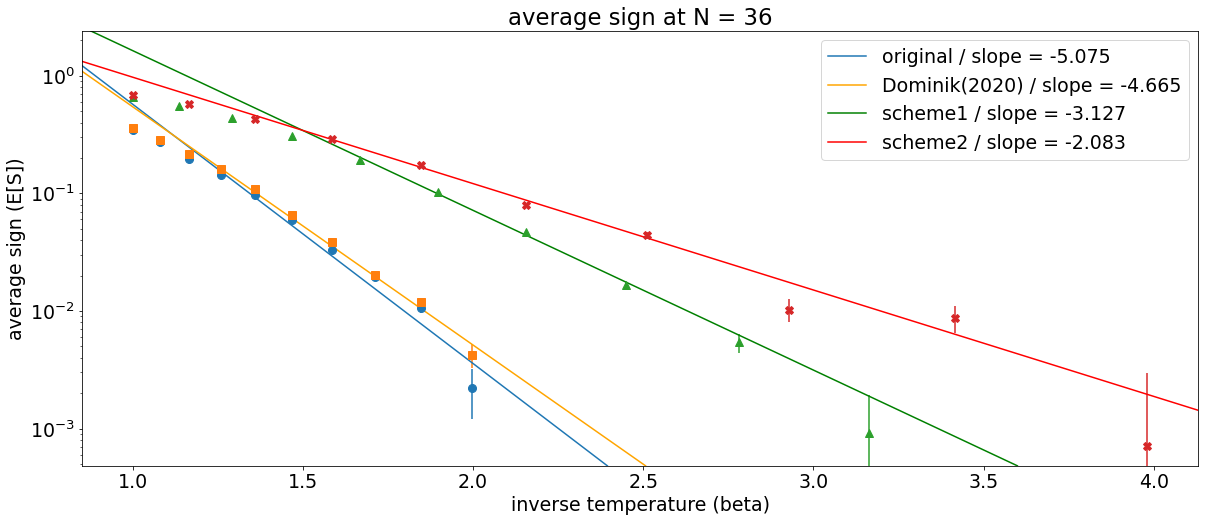

In [30]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 19})

fig, ax = plt.subplots(figsize=(20,8))
Ls = D[0]
Sign = D[1]
ax.errorbar(1/Ls[0], Sign[0][:,0],yerr=Sign[0][:,1], fmt="o", markersize = 8)
ax.errorbar(1/Ls[1], Sign[1][:,0],yerr=Sign[1][:,1], fmt = "s", markersize = 8)
ax.errorbar(1/Ls[2], Sign[2][:,0],yerr=Sign[2][:,1], fmt = "^", markersize = 8)
ax.errorbar(1/Ls[3], Sign[3][:,0],yerr=Sign[3][:,1], fmt = "X", markersize = 8)


a = 0
fit = np.polyfit(1/Ls[a][2:], np.log(Sign[a][:,0])[2:], 1)
linex = 1/Ls[a]
liney = np.exp(fit[1] + fit[0]*1/Ls[a])
ax.axline((linex[0],liney[0]), (linex[1],liney[1]), label = f"original / slope = {fit[0]:.4}")

a = 1
fit = np.polyfit(1/Ls[a][2:], np.log(Sign[a][:,0])[2:], 1)
linex = 1/Ls[a]
liney = np.exp(fit[1] + fit[0]*1/Ls[a])
ax.axline((linex[0],liney[0]), (linex[1],liney[1]), label = f"Dominik(2020) / slope = {fit[0]:.4}", c = 'orange')


a = 2
s = 4
err = - np.log(Sign[a][:,0] - Sign[a][:,1])[s:] + np.log(Sign[a][:,0] + Sign[a][:,1])[s:]
err[-1] = 10
err = np.maximum(0.1, err)
fit = np.polyfit(1/Ls[a][s:], np.log(Sign[a][:,0])[s:], 1, w = 1/err)
linex = 1/Ls[a]
liney = np.exp(fit[1] + fit[0]*1/Ls[a])
ax.axline((linex[0],liney[0]), (linex[1],liney[1]), label = f"scheme1 / slope = {fit[0]:.4}",c = 'green')

# a = 2
# fit = np.polyfit(1/Ls[a][4:], np.log(Sign[a][:,0])[4:], 1)
# linex = 1/Ls[a]
# liney = np.exp(fit[1] + fit[0]*1/Ls[a])
# ax.axline((linex[0],liney[0]), (linex[1],liney[1]), label = f"scheme1 / slope = {fit[0]:.4}",c = 'green')

a = 3
s = 4
err = - np.log(Sign[a][:,0] - Sign[a][:,1])[s:] + np.log(Sign[a][:,0] + Sign[a][:,1])[s:]
err[-1] = 10
err = np.maximum(0.1, err)
fit = np.polyfit(1/Ls[a][s:], np.log(Sign[a][:,0])[s:], 1, w = 1/err)
linex = 1/Ls[a]
liney = np.exp(fit[1] + fit[0]*1/Ls[a])
ax.axline((linex[0],liney[0]), (linex[1],liney[1]), label = f"scheme2 / slope = {fit[0]:.4}", c = 'red')


# ax.axhline(y=0.01, color='b', linestyle='-')

# fit3 = np.polyfit(Ls[2]*3, np.log(Sign[2][:,0]), 1)
# ax.plot(np.array(L2) * 4, np.exp(fit2[1] + fit2[0]*(np.array(L2) * 4)), label = f"optim2 / slope = {fit2[0]:.4}")



ax.set_title(f'average sign at N = 36')
ax.set_xlabel('inverse temperature (beta)')
ax.set_ylabel('average sign (E[S])')
ax.set_yscale('log')

ax.legend()
fig.show()

In [160]:
err

array([0.02546978, 0.05121427, 0.13719795, 0.84392182, 1.        ,
       1.        ])

In [148]:
a = 2
s = 4
err = - np.log(Sign[a][:,0] - Sign[a][:,1])[s:] + np.log(Sign[a][:,0] + Sign[a][:,1])[s:]
fit = np.polyfit(1/Ls[a][s:], np.log(Sign[a][:,0])[s:], 1, w = 1/err)
linex = 1/Ls[a]
liney = np.exp(fit[1] + fit[0]*1/Ls[a])

In [146]:
err

array([0.02329037, 0.04187468, 0.11899607, 0.29594008, 0.96242466,
       1.79221055])

In [117]:
err

array([0.02329037, 0.04187468, 0.11899607, 0.29594008,        nan,
       1.79221055])

### Temperature

In [55]:
import subprocess
energy_array = []
sign_array = []
time_array = []
for t in T:
    out = subprocess.Popen(["./test_/3site_construct", "-L1", "12", "-T", f"{t}"], 
               stdout=subprocess.PIPE, 
               stderr=subprocess.STDOUT)
    stdout,stderr = out.communicate()

    energy, sign, dimer, time, _ = process_line(stdout)
    print(f"T = {t}",sign)
    energy_array.append(energy)
    sign_array.append(sign)
    time_array.append(time)
    
sign_array1 = np.array(sign_array)

L = 2 [0.00068, 0.0031623]
L = 2 [-0.00096, 0.00316229]
L = 2 [-0.0048, 0.00316228]
L = 2 [0.00424, 0.00316227]
L = 2 [0.0252, 0.00316129]
L = 2 [0.06764, 0.00315505]
L = 2 [0.13812, 0.00313198]
L = 2 [0.2553, 0.0030575]
L = 2 [0.33606, 0.00297838]


In [56]:
import subprocess
energy_array = []
sign_array = []
time_array = []
for t in T:
    out = subprocess.Popen(["./test_/3site_construct", "-L1", "12", "-T", f"{t}"], 
               stdout=subprocess.PIPE, 
               stderr=subprocess.STDOUT)
    stdout,stderr = out.communicate()

    energy, sign, dimer, time, _ = process_line(stdout)
    print(f"T = {t}",sign)
    energy_array.append(energy)
    sign_array.append(sign)
    time_array.append(time)
    
sign_array2 = np.array(sign_array)

L = 2 [0.0002, 0.00316239]
L = 2 [0.00312, 0.00316237]
L = 2 [0.00352, 0.00316227]
L = 2 [0.04624, 0.00315891]
L = 2 [0.14432, 0.00312919]
L = 2 [0.28504, 0.00303114]
L = 2 [0.41442, 0.00287796]
L = 2 [0.52982, 0.00268198]
L = 2 [0.62614, 0.00174349]


In [57]:
import subprocess
energy_array = []
sign_array = []
time_array = []
for t in T:
    out = subprocess.Popen(["./test_/3site_construct", "-L1", "3", "-T", f"{t}"], 
               stdout=subprocess.PIPE, 
               stderr=subprocess.STDOUT)
    stdout,stderr = out.communicate()

    energy, sign, dimer, time, _ = process_line(stdout)
    print(f"T = {t}",sign)
    energy_array.append(energy)
    sign_array.append(sign)
    time_array.append(time)
    
sign_array3 = np.array(sign_array)

T = 0.2 [0.00202, 0.00223661]
T = 0.30000000000000004 [0.00389, 0.00223627]
T = 0.4000000000000001 [0.04328, 0.00223405]
T = 0.5000000000000001 [0.12108, 0.00221967]
T = 0.6000000000000001 [0.25303, 0.00216332]
T = 0.7000000000000002 [0.38115, 0.00206728]
T = 0.8000000000000003 [0.49768, 0.00193951]
T = 0.9000000000000001 [0.59783, 0.0017925]
T = 1.0000000000000002 [0.6916, 0.00161508]


In [53]:
D[0][2] = D[0][2][1:]

In [54]:
D[1][2] = D[1][2][1:]

/tmp/ipykernel_154656/3973863681.py:9: RuntimeWarning: invalid value encountered in log
  fit1 = np.polyfit(beta, np.log(sign_array1[:,0]), 1)


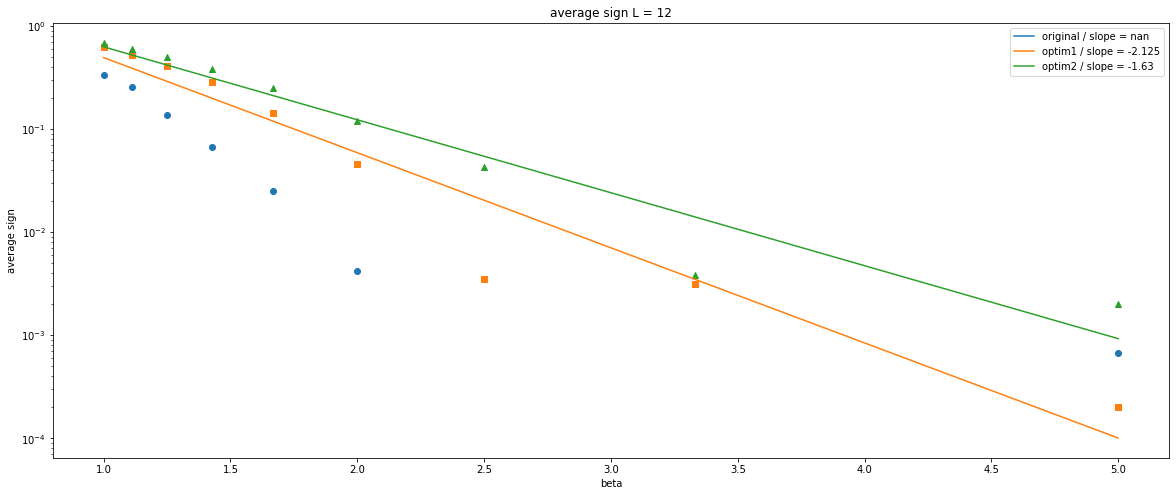

In [66]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20,8))
beta = 1/T
ax.scatter(beta, sign_array1[:,0])
ax.scatter(beta, sign_array2[:,0], marker = ",")
ax.scatter(beta, sign_array3[:,0], marker = "^")

fit1 = np.polyfit(beta, np.log(sign_array1[:,0]), 1)
ax.plot(beta, np.exp(fit1[1] + fit1[0]*beta), label = f"original / slope = {fit1[0]:.4}")

fit2 = np.polyfit(beta, np.log(sign_array2[:,0]), 1)
ax.plot(beta, np.exp(fit2[1] + fit2[0]*beta), label = f"optim1 / slope = {fit2[0]:.4}")

fit2 = np.polyfit(beta, np.log(sign_array3[:,0]), 1)
ax.plot(beta, np.exp(fit2[1] + fit2[0]*beta), label = f"optim2 / slope = {fit2[0]:.4}")



ax.set_title(f'average sign L = 12')
ax.set_xlabel('beta')
ax.set_ylabel('average sign')
ax.set_yscale('log')

ax.legend()
fig.show()

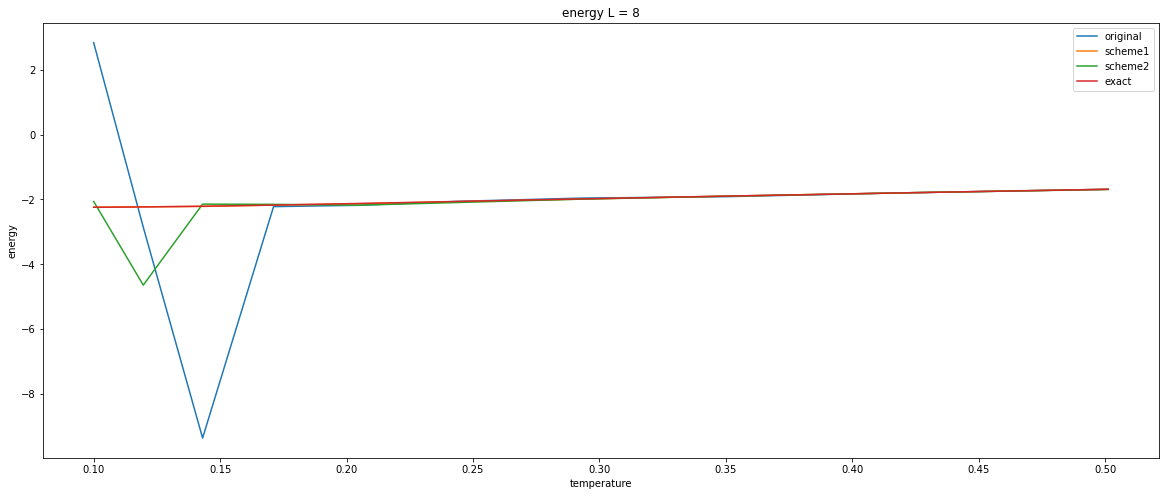

In [151]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20,8))
ax.plot(T, energy_array[:,0], label = "original")
ax.plot(T, energy_array2[:,0], label = "scheme1")
ax.plot(T, energy_array3[:,0], label = "scheme2")

ax.plot(T, E_exact[:], label = "exact")

ax.set_title(f'energy L = 8')
ax.set_xlabel('temperature')
ax.set_ylabel('energy')
ax.legend()
fig.show()

## L = 6 Reweighting 

In [10]:
import subprocess
path = ["-PATH1", "../python/array/MG_union_bond.npy", "-PATH2", "../python/array/MG_union_abs.npy"]
worm = ["-N_PATH", "1", "-fw" , "1", "-zw", "1", "-pom", "1"]
energy_array = []
sign_array = []
time_array = []
weight_array = []
for t in T:
    out = subprocess.Popen(["./MG", "-L", "6", "-T", "{:.2f}".format(t), "-m", "100000", "-n", "1000000", "-M", "MG_2", "-shift", "0.25"]+worm+path, 
               stdout=subprocess.PIPE, 
               stderr=subprocess.STDOUT)
    stdout,stderr = out.communicate()

    energy, sign, dimer, time, weight = process_line(stdout)
    print(f"T = {t}",energy)
    energy_array.append(energy)
    sign_array.append(sign)
    time_array.append(time)
    weight_array.append(weight)

T = 0.1 [-9.20198, 1876.59]
T = 0.11961283330787534 [-4.77857, 457.319]
T = 0.14307229891937576 [-5.54573, 73.451]
T = 0.1711328304161781 [-3.62451, 14.0525]
T = 0.2046968271807521 [-1.56813, 5.84637]
T = 0.24484367468222268 [-2.57311, 1.31698]
T = 0.2928644564625237 [-2.05272, 0.413549]
T = 0.3503034741265337 [-1.92398, 0.195934]
T = 0.41900791057866693 [-1.76627, 0.0895232]
T = 0.5011872336272722 [-1.71753, 0.0490967]


## L = 6 Reweighting

In [11]:
import subprocess
path = ["-PATH1", "../python/array/MG_union_bond1.npy", "-PATH2", "../python/array/MG_union_abs1.npy"]
worm = ["-N_PATH", "1", "-fw" , "1", "-zw", "1", "-pom", "1"]
energy_array_abs1 = []
sign_array_abs1 = []
time_array_abs1 = []
weight_array_abs1 = []
for t in T:
    out = subprocess.Popen(["./MG", "-L", "6", "-T", "{:.2f}".format(t), "-m", "100000", "-n", "1000000", "-M", "MG_2", "-shift", "0.25"]+worm+path, 
               stdout=subprocess.PIPE, 
               stderr=subprocess.STDOUT)
    stdout,stderr = out.communicate()

    energy, sign, dimer, time, weight = process_line(stdout)
    print(f"T = {t}",energy)
    energy_array_abs1.append(energy)
    sign_array_abs1.append(sign)
    time_array_abs1.append(time)
    weight_array_abs1.append(weight)

T = 0.1 [-3.61403, 3.2752]
T = 0.11961283330787534 [-3.82605, 2.1625]
T = 0.14307229891937576 [-0.344306, 12.0205]
T = 0.1711328304161781 [-3.93215, 2.17735]
T = 0.2046968271807521 [-10.441, 6.86864]
T = 0.24484367468222268 [-1.60903, 0.910623]
T = 0.2928644564625237 [-1.96695, 0.239194]
T = 0.3503034741265337 [-1.97821, 0.094893]
T = 0.41900791057866693 [-1.77284, 0.0498599]
T = 0.5011872336272722 [-1.6447, 0.0286078]


### L = 6 Reweighting2 

In [ ]:
import subprocess
path = ["-PATH1", "../python/array/MG_union_bond1.npy", "-PATH2", "../python/array/MG_union_abs1.npy"]
worm = ["-N_PATH", "1", "-fw" , "1", "-zw", "1", "-pom", "1"]
energy_array_abs1 = []
sign_array_abs1 = []
time_array_abs1 = []
weight_array_abs1 = []
for t in T:
    out = subprocess.Popen(["./MG", "-L", "6", "-T", "{:.2f}".format(t), "-m", "100000", "-n", "1000000", "-M", "MG_2", "-shift", "0.25"]+worm+path, 
               stdout=subprocess.PIPE, 
               stderr=subprocess.STDOUT)
    stdout,stderr = out.communicate()

    energy, sign, dimer, time, weight = process_line(stdout)
    print(f"T = {t}",energy)
    energy_array_abs1.append(energy)
    sign_array_abs1.append(sign)
    time_array_abs1.append(time)
    weight_array_abs1.append(weight)

### L = 12



In [10]:
import subprocess
path = ["-PATH1", "../python/array/MG_union_bond.npy"]
worm = ["-fw" , "1", "-zw", "1", "-pom", "1"]
energy_array_12 = []
sign_array_12 = []
time_array_12 = []
for t in T:
    out = subprocess.Popen(["./MG", "-L", "12", "-T", "{:.2f}".format(t), "-m", "100000", "-n", "2000000", "-M", "MG_2", "-shift", "0.25"]+worm+path, 
               stdout=subprocess.PIPE, 
               stderr=subprocess.STDOUT)
    stdout,stderr = out.communicate()

    energy, sign, dimer, time = process_line(stdout)
    print(f"T = {t}",energy)
    energy_array_12.append(energy)
    sign_array_12.append(sign)
    time_array_12.append(time)

T = 0.1 [-7.13024, 15.0374]
T = 0.11961283330787534 [-6.78191, 6.82421]
T = 0.14307229891937576 [-6.10419, 22.5758]
T = 0.1711328304161781 [-6.43155, 6.55127]
T = 0.2046968271807521 [-6.34608, 6.70384]
T = 0.24484367468222268 [-9.76023, 9.49597]
T = 0.2928644564625237 [-3.74869, 0.727581]
T = 0.3503034741265337 [-3.59482, 0.216438]
T = 0.41900791057866693 [-3.55309, 0.0731322]
T = 0.5011872336272722 [-3.29993, 0.0314568]


In [15]:
import subprocess
path = ["-PATH1", "../python/array/MG_union_rns2_bond.npy"]
worm = ["-fw" , "1", "-zw", "1", "-pom", "1"]
energy_array_2_12 = []
sign_array_2_12 = []
time_array_2_12 = []
for t in T:
    out = subprocess.Popen(["./MG", "-L", "12", "-T", "{:.2f}".format(t), "-m", "100000", "-n", "2000000", "-M", "MG_2", "-shift", "0"]+worm+path, 
               stdout=subprocess.PIPE, 
               stderr=subprocess.STDOUT)
    stdout,stderr = out.communicate()

    energy, sign, dimer, time = process_line(stdout)
    print(f"T = {t}",energy)
    energy_array_2_12.append(energy)
    sign_array_2_12.append(sign)
    time_array_2_12.append(time)

T = 0.1 [-5.62843, 9.0482]
T = 0.11961283330787534 [-6.6268, 7.63359]
T = 0.14307229891937576 [-7.00973, 11.2619]
T = 0.1711328304161781 [-4.74861, 2.36157]
T = 0.2046968271807521 [-6.06738, 5.18516]
T = 0.24484367468222268 [-4.40993, 0.734929]
T = 0.2928644564625237 [-3.80766, 0.245484]
T = 0.3503034741265337 [-3.68589, 0.0794423]
T = 0.41900791057866693 [-3.52396, 0.0336036]
T = 0.5011872336272722 [-3.3113, 0.0167905]


In [16]:
sign_array_12 = np.array(sign_array_12)
sign_array_2_12 = np.array(sign_array_2_12)
energy_array_12 = np.array(energy_array_12)
energy_array_2_12 = np.array(energy_array_2_12)


In [17]:
sign_array_12

array([[-0.000453  ,  0.00070711],
       [-0.000972  ,  0.00070711],
       [ 0.000279  ,  0.00070711],
       [-0.000986  ,  0.00070711],
       [ 0.000957  ,  0.00070711],
       [-0.000872  ,  0.00070711],
       [ 0.007225  ,  0.00070709],
       [ 0.023737  ,  0.00070691],
       [ 0.068434  ,  0.00070545],
       [ 0.150835  ,  0.00069902]])

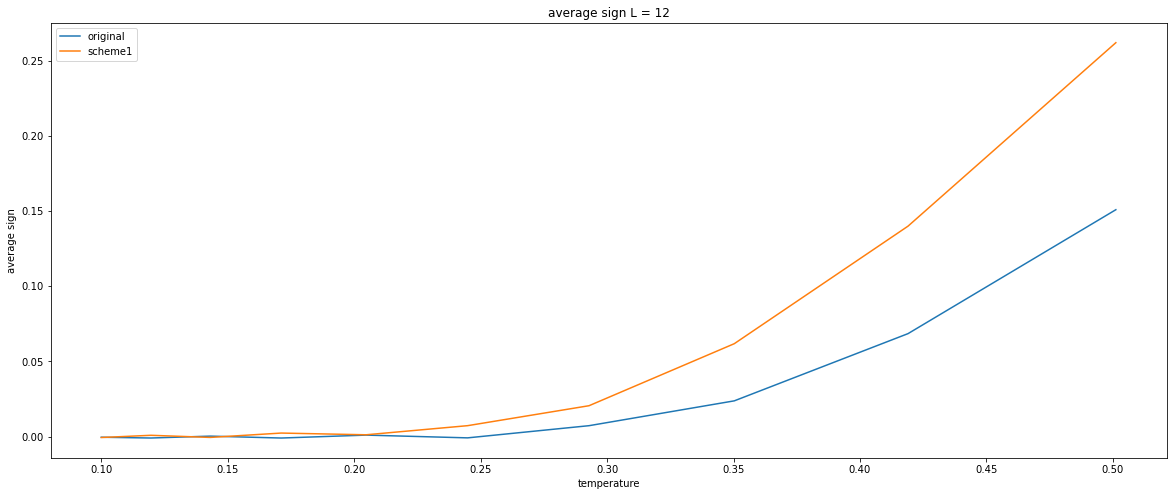

In [25]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20,8))
ax.plot(T, sign_array_12[:,0], label = "original")
ax.plot(T, sign_array_2_12[:,0], label = "scheme1")

ax.set_title(f'average sign L = 12')
ax.set_xlabel('temperature')
ax.set_ylabel('average sign')
ax.legend()
# fig.show()
fig.savefig("../doc/img/MG_sign_L12.png")

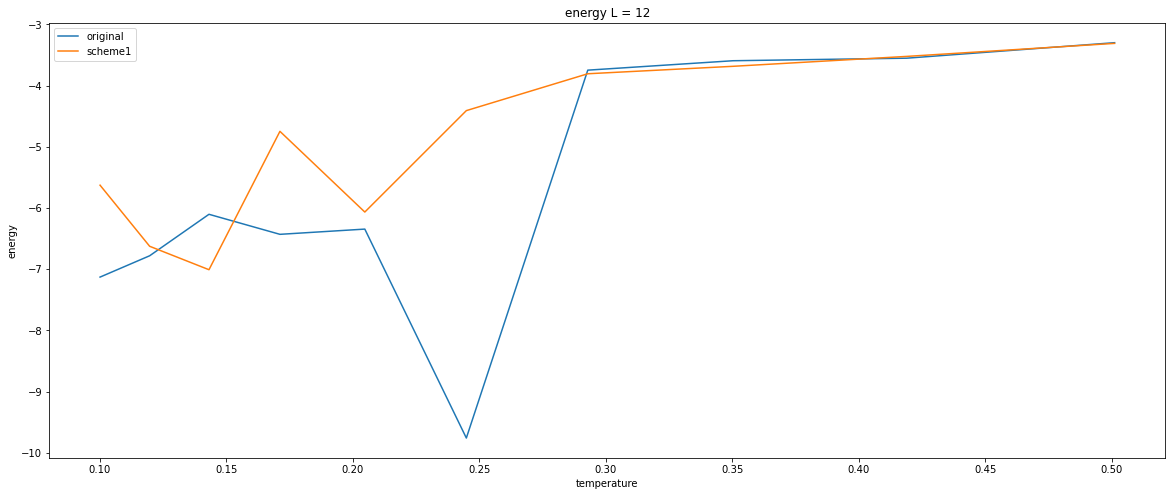

In [26]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20,8))
ax.plot(T, energy_array_12[:,0], label = "original")
ax.plot(T, energy_array_2_12[:,0], label = "scheme1")


ax.set_title(f'energy L = 12')
ax.set_xlabel('temperature')
ax.set_ylabel('energy')
ax.legend()
fig.savefig("../doc/img/MG_energy_L12.png")

### L = 18



In [27]:
import subprocess
path = ["-PATH1", "../python/array/MG_union_bond.npy"]
worm = ["-fw" , "1", "-zw", "1", "-pom", "1"]
energy_array_12 = []
sign_array_12 = []
time_array_12 = []
for t in T:
    out = subprocess.Popen(["./MG", "-L", "18", "-T", "{:.2f}".format(t), "-m", "100000", "-n", "1000000", "-M", "MG_2", "-shift", "0.25"]+worm+path, 
               stdout=subprocess.PIPE, 
               stderr=subprocess.STDOUT)
    stdout,stderr = out.communicate()

    energy, sign, dimer, time = process_line(stdout)
    print(f"T = {t}",energy)
    energy_array_12.append(energy)
    sign_array_12.append(sign)
    time_array_12.append(time)

T = 0.1 [-10.5689, 13.1155]
T = 0.11961283330787534 [-7.60712, 14.9161]
T = 0.14307229891937576 [-10.8398, 12.4079]
T = 0.1711328304161781 [-9.77373, 11.104]
T = 0.2046968271807521 [-10.8335, 5.85687]
T = 0.24484367468222268 [-3.68201, 17.3682]
T = 0.2928644564625237 [-8.26919, 3.00431]
T = 0.3503034741265337 [-6.63511, 2.33449]
T = 0.41900791057866693 [-5.15509, 0.511456]
T = 0.5011872336272722 [-4.89099, 0.165893]


In [28]:
import subprocess
path = ["-PATH1", "../python/array/MG_union_rns2_bond.npy"]
worm = ["-fw" , "1", "-zw", "1", "-pom", "1"]
energy_array_2_12 = []
sign_array_2_12 = []
time_array_2_12 = []
for t in T:
    out = subprocess.Popen(["./MG", "-L", "18", "-T", "{:.2f}".format(t), "-m", "100000", "-n", "1000000", "-M", "MG_2", "-shift", "0"]+worm+path, 
               stdout=subprocess.PIPE, 
               stderr=subprocess.STDOUT)
    stdout,stderr = out.communicate()

    energy, sign, dimer, time = process_line(stdout)
    print(f"T = {t}",energy)
    energy_array_2_12.append(energy)
    sign_array_2_12.append(sign)
    time_array_2_12.append(time)

T = 0.1 [-8.57304, 5.292]
T = 0.11961283330787534 [-7.39095, 8.69263]
T = 0.14307229891937576 [-11.0393, 20.6102]
T = 0.1711328304161781 [-7.27392, 36.6676]
T = 0.2046968271807521 [-1.93654, 12.6347]
T = 0.24484367468222268 [-10.35, 52.5535]
T = 0.2928644564625237 [-6.14557, 2.17611]
T = 0.3503034741265337 [-5.6284, 0.572936]
T = 0.41900791057866693 [-5.24486, 0.157389]
T = 0.5011872336272722 [-4.99807, 0.0630074]


In [29]:
sign_array_12 = np.array(sign_array_12)
sign_array_2_12 = np.array(sign_array_2_12)
energy_array_12 = np.array(energy_array_12)
energy_array_2_12 = np.array(energy_array_2_12)


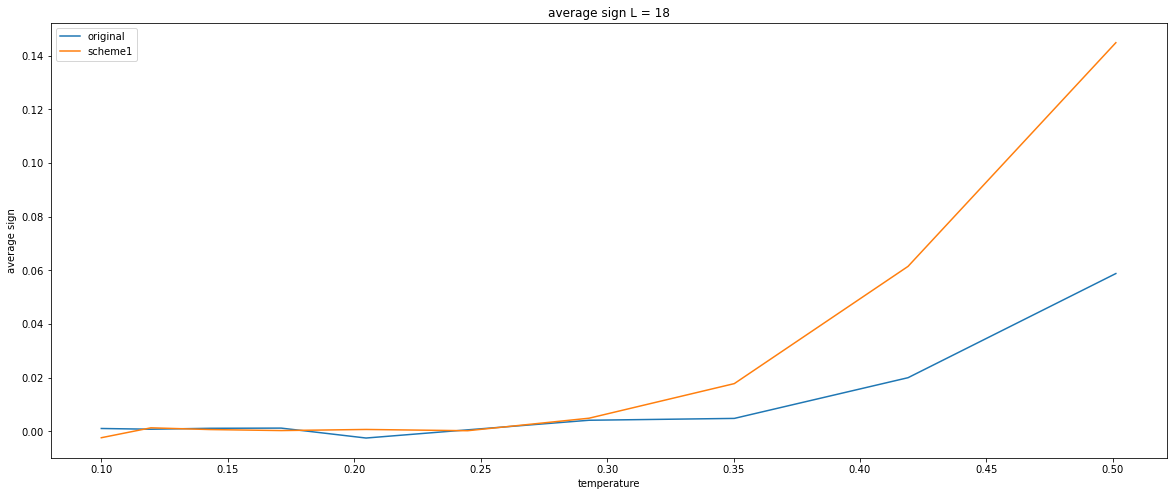

In [30]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20,8))
ax.plot(T, sign_array_12[:,0], label = "original")
ax.plot(T, sign_array_2_12[:,0], label = "scheme1")

ax.set_title(f'average sign L = 18')
ax.set_xlabel('temperature')
ax.set_ylabel('average sign')
ax.legend()
# fig.show()
fig.savefig("../doc/img/MG_sign_L18.png")

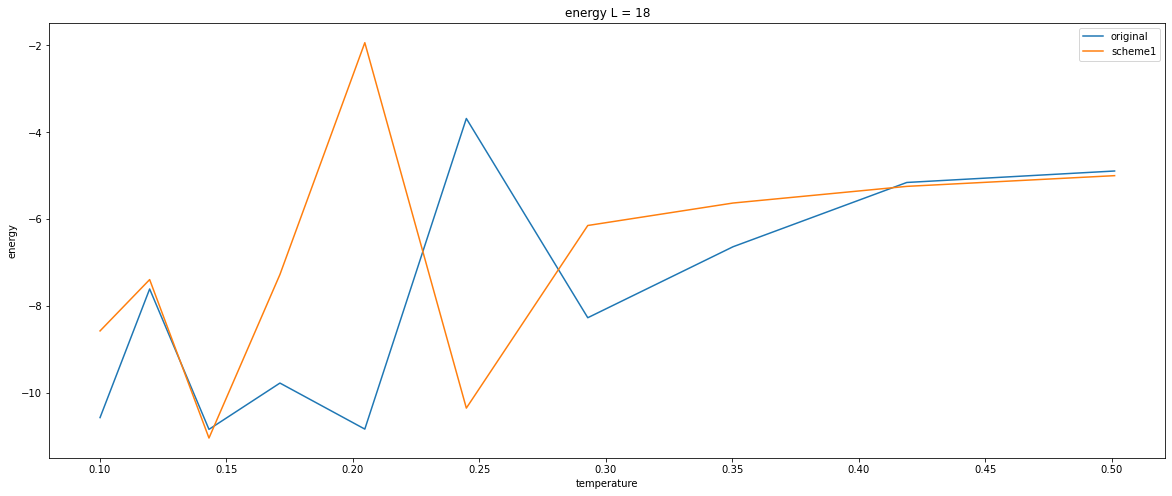

In [31]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20,8))
ax.plot(T, energy_array_12[:,0], label = "original")
ax.plot(T, energy_array_2_12[:,0], label = "scheme1")


ax.set_title(f'energy L = 18')
ax.set_xlabel('temperature')
ax.set_ylabel('energy')
ax.legend()
fig.savefig("../doc/img/MG_energy_L18.png")